# 小作业3 数据可视化


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

## 作业1 

依据图表信息绘制历次人口普查全国人口数量柱状图。

In [144]:
# 首先将人口普查数据存为一个 DataFrame 对象
data = pd.DataFrame(
    data={
        '普查年份': [1953, 1964, 1982, 1990, 2000, 2010, 2020],
        '全国人口': [58260, 69458, 100818, 113368, 126583, 133972, 141178],
    },
)

data.set_index('普查年份', inplace=True)

data

,全国人口
普查年份,
1953,58260
1964,69458
1982,100818
1990,113368
2000,126583
2010,133972
2020,141178


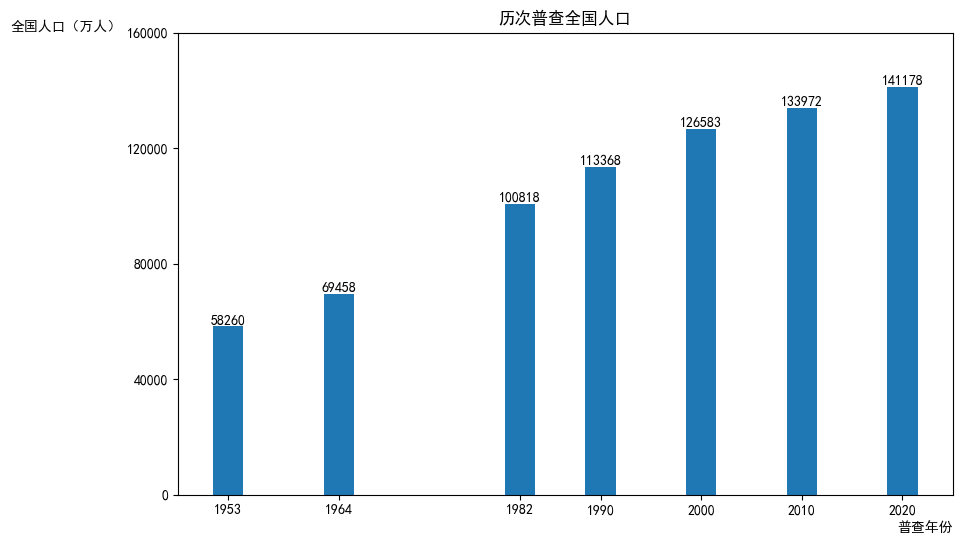

In [145]:
# 设置图片大小
plt.figure(figsize=(10, 6))

# 设置横纵坐标的数据
x = data.index
y = data['全国人口']

# 设置坐标轴显示范围
plt.ylim(0, 160001)

# 设置坐标轴刻度
plt.xticks(x)
plt.yticks(np.arange(0, 160001, 40000))

# 设置横纵坐标标签
plt.xlabel('普查年份', loc='right')
plt.ylabel('全国人口（万人）', loc='top', rotation=0)

# 设置图标标题
plt.title('历次普查全国人口')

# 画出条形图
plt.bar(x, y, width=3, align='center')

# 为每个条形图添加数值标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom')


# 显示图像
plt.show()

## 作业2

依据右图信息绘制某人2020年支付宝年支出情况饼图,图中应展示各类型支出占总支出的比例。

In [146]:
# 首先将数据保存为 DataFrame 格式
data = pd.DataFrame(
    data={
        '支出类型': ['酒店旅游', '转账红包', '餐饮美食', '日用百货', '交通出行', '充值缴费', '服饰装扮', '互助保障'],
        '支出金额': [21914.00, 19973.20, 10379.59, 9859.93, 8351.35, 2428.54, 950.83, 827.20],
    }
)

data.set_index('支出类型', inplace=True)

data

,支出金额
支出类型,
酒店旅游,21914.00
转账红包,19973.20
餐饮美食,10379.59
日用百货,9859.93
交通出行,8351.35
充值缴费,2428.54
服饰装扮,950.83
互助保障,827.20


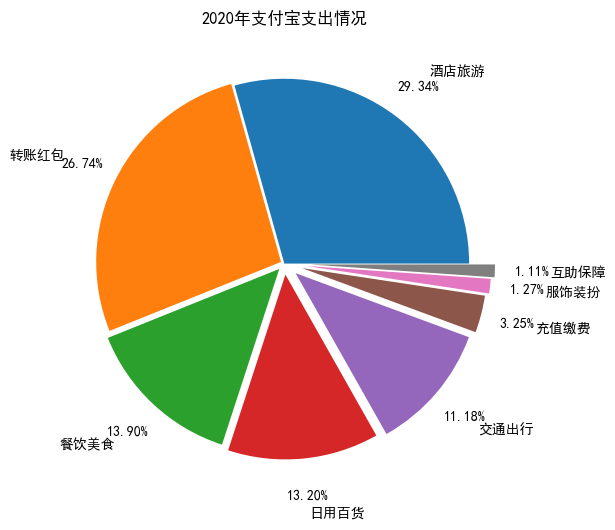

In [147]:
# 设置图表大小
plt.figure(figsize=(10, 6))

# 设置饼图数据来源
sizes = data['支出金额']
labels = data.index

# 设置饼图标题
plt.title('2020年支付宝支出情况')

# 画出饼图
explode = [0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14]
plt.pie(x=sizes, explode=explode, labels=labels,
        autopct='%.2f%%', pctdistance=1.2, labeldistance=1.3)

# 显示图像
plt.show()

## 作业3

使用IRIS数据集,在一个figure中绘制出右侧的16个子图。分别使用花瓣长度花瓣宽度、花萼长度和花萼宽度这四种数据,两两组合绘制散点图。

In [148]:
# 读入数据
data = pd.read_csv('iris.csv')

data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


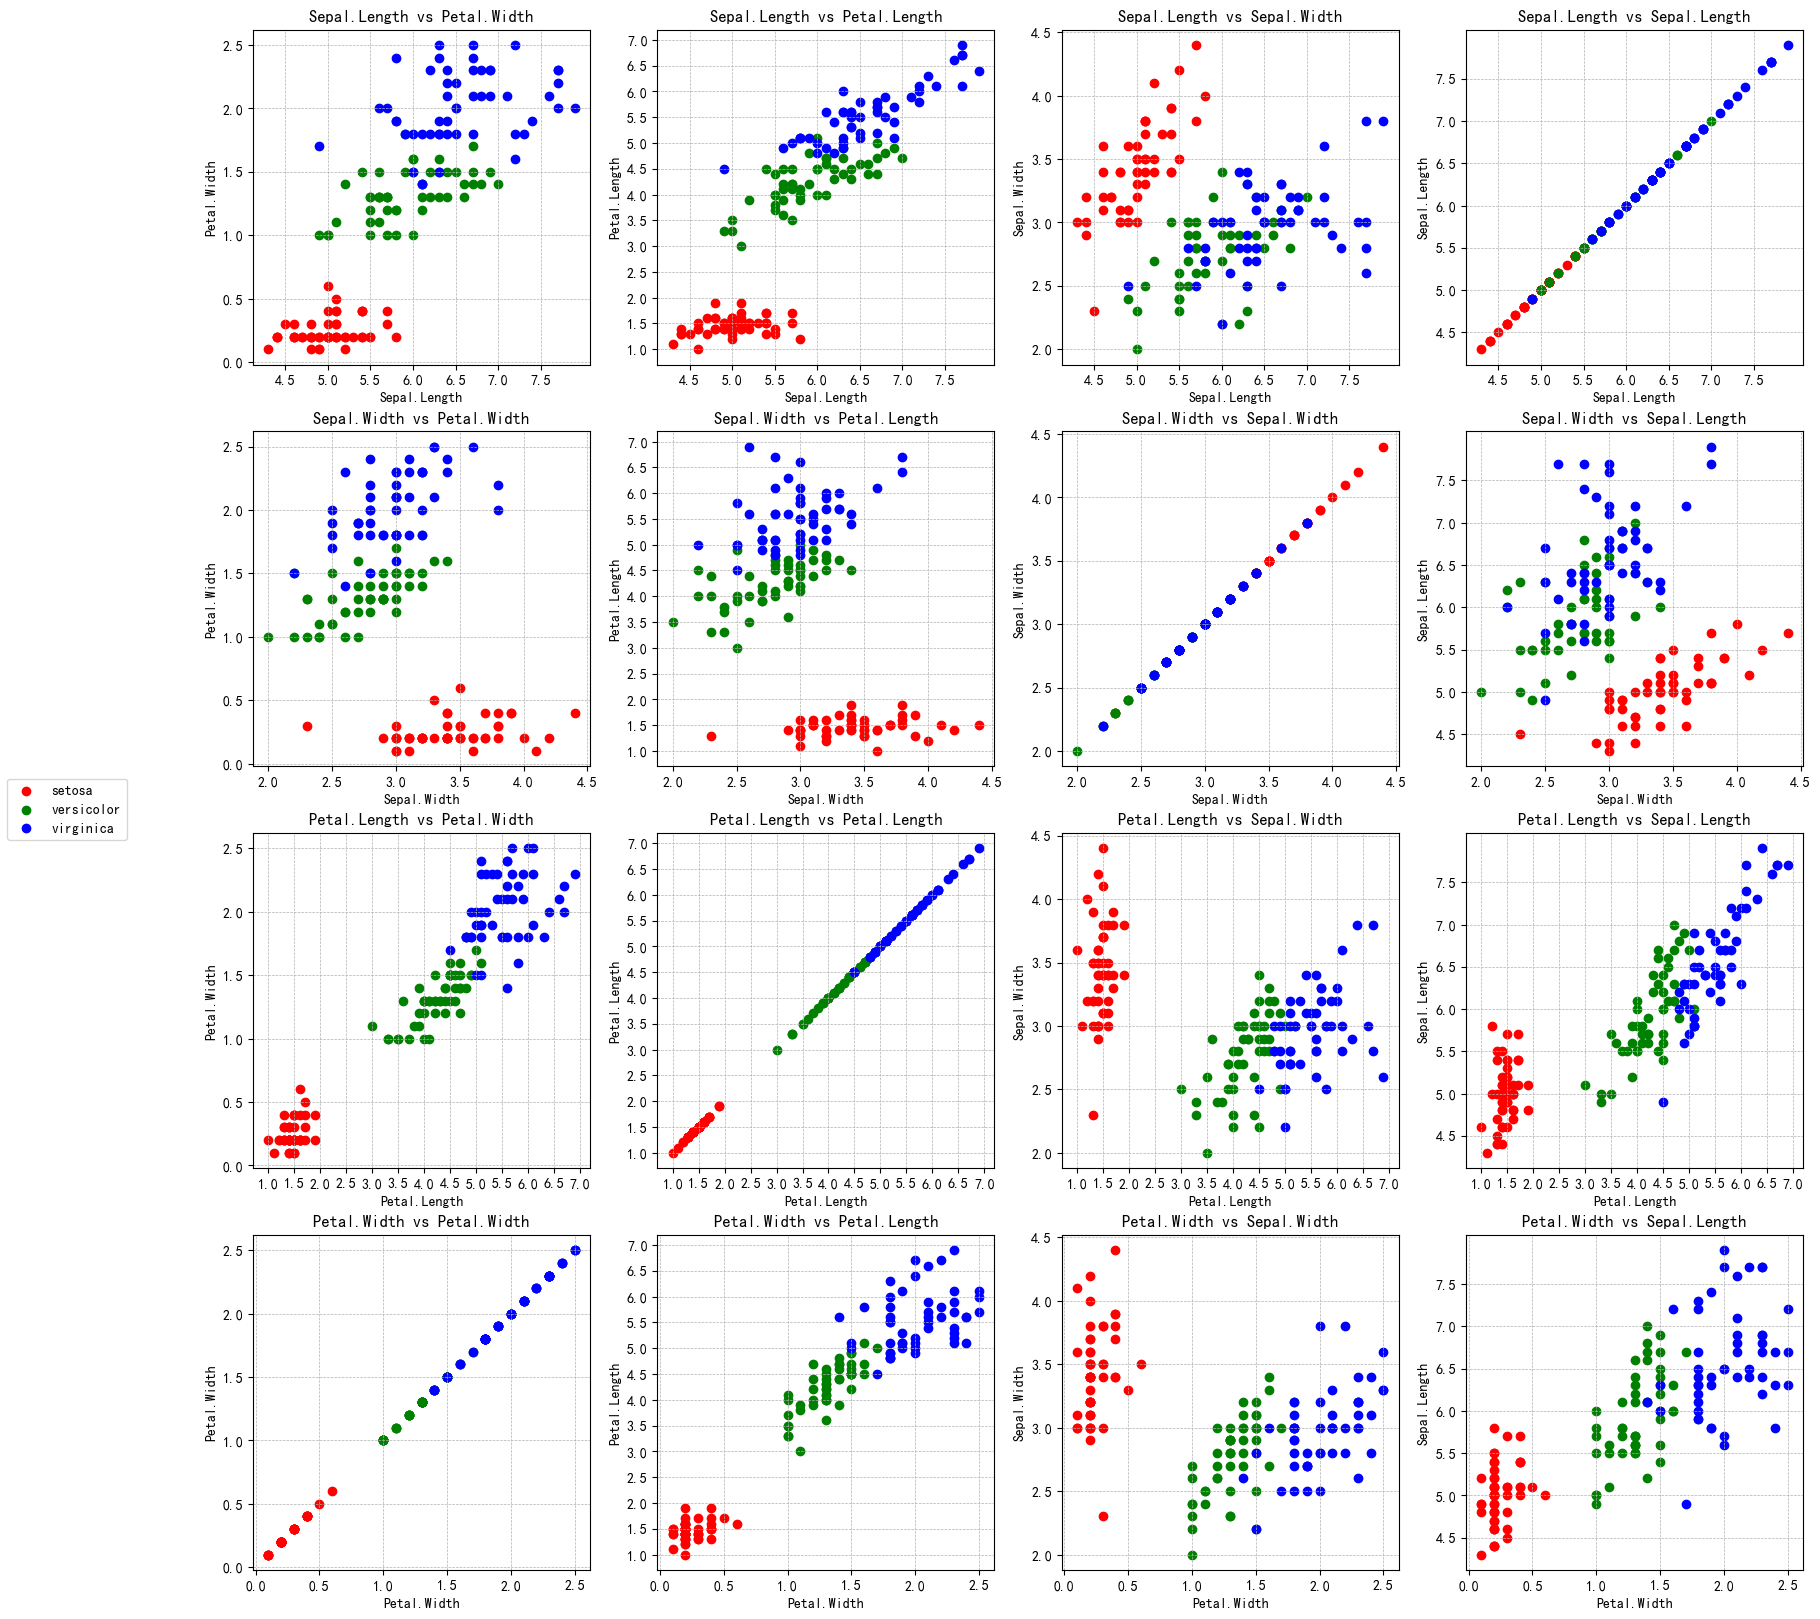

In [149]:
# 创建画布并划分子图
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

def sub(i, j, a, b, data, axes):
    # 选择数据列
    a = data.columns[a]
    b = data.columns[b]
    
    # 设置坐标轴刻度
    axes[i, j].set_xticks(np.arange(0, 8, 0.5))
    axes[i, j].set_yticks(np.arange(0, 8, 0.5))

    # 设置横纵坐标标签
    axes[i, j].set_xlabel(a)
    axes[i, j].set_ylabel(b)

    # 设置网格线
    axes[i, j].grid(visible=True, linestyle='--', linewidth=0.5)

    # 设置标题
    axes[i, j].set_title(f'{a} vs {b}')

    # 绘制 setosasa 的散点图
    x_setosa = data[data['Species'] == 'setosa'][a]
    y_setosa = data[data['Species'] == 'setosa'][b]
    axes[i, j].scatter(x_setosa, y_setosa, c='r', marker='o', label='setosa')

    # 绘制 versicolor 的散点图
    x_versicolor = data[data['Species'] == 'versicolor'][a]
    y_versicolor = data[data['Species'] == 'versicolor'][b]
    axes[i, j].scatter(x_versicolor, y_versicolor, c='g', marker='o', label='versicolor')

    # 绘制 virginica 的散点图
    x_virginica = data[data['Species'] == 'virginica'][a]
    y_virginica = data[data['Species'] == 'virginica'][b]
    axes[i, j].scatter(x_virginica, y_virginica, c='b', marker='o', label='virginica')

# 画出子图
for i in range(4):
    for j in range(4):
        sub(i, j, i, 3 - j, data, axes)

# 设置图例
fig.legend(handles=axes[0, 0].get_legend_handles_labels()[0],
           labels=['setosa', 'versicolor', 'virginica'],
           loc='center left')

# 显示图像
plt.show()

## 作业4

使用给出的“八年级期末考试成绩表.xlsx”,在一个figure中绘制六个子图,分别绘制六门课程的成绩分段统计情况直方图,每10分一个分段。

In [150]:
# 读入数据
data = pd.read_excel('八年级期末考试成绩表.xlsx')

data

,考号,地理分数,历史分数,政治分数,生物分数,物理分数,英语分数,数学分数,语文分数,姓名,...,生物级名,政治班名,政治级名,历史班名,历史级名,地理班名,地理级名,总分分数,总分班名,总分级名
0,103,77,94,96,93,96,107,116,105,谭慕,...,37,1,1,2,6,5,11,784,1,1
1,109,78,93,96,92,94,107,116,105,刘雨露,...,49,1,1,6,10,3,6,781,1,2
2,101,83,92,91,95,83,109,116,101,石依梦,...,16,2,11,3,12,1,1,770,1,3
3,130,75,98,94,93,96,101,113,100,谭鸣,...,37,2,3,1,1,5,14,770,2,3
4,104,79,90,93,97,97,106,102,102,聂宸涞,...,4,3,4,9,20,2,4,766,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,605,0,0,0,0,0,0,0,0,刘祥宇,...,291,57,294,56,294,56,295,0,57,297
299,607,0,0,0,0,0,0,0,0,梁星星,...,291,65,294,65,294,65,295,0,65,297
300,445,0,0,0,0,0,0,0,0,张万年,...,291,60,294,60,294,60,295,0,60,297
301,340,0,0,0,0,0,0,0,0,孙辰,...,291,60,294,60,294,60,295,0,60,297


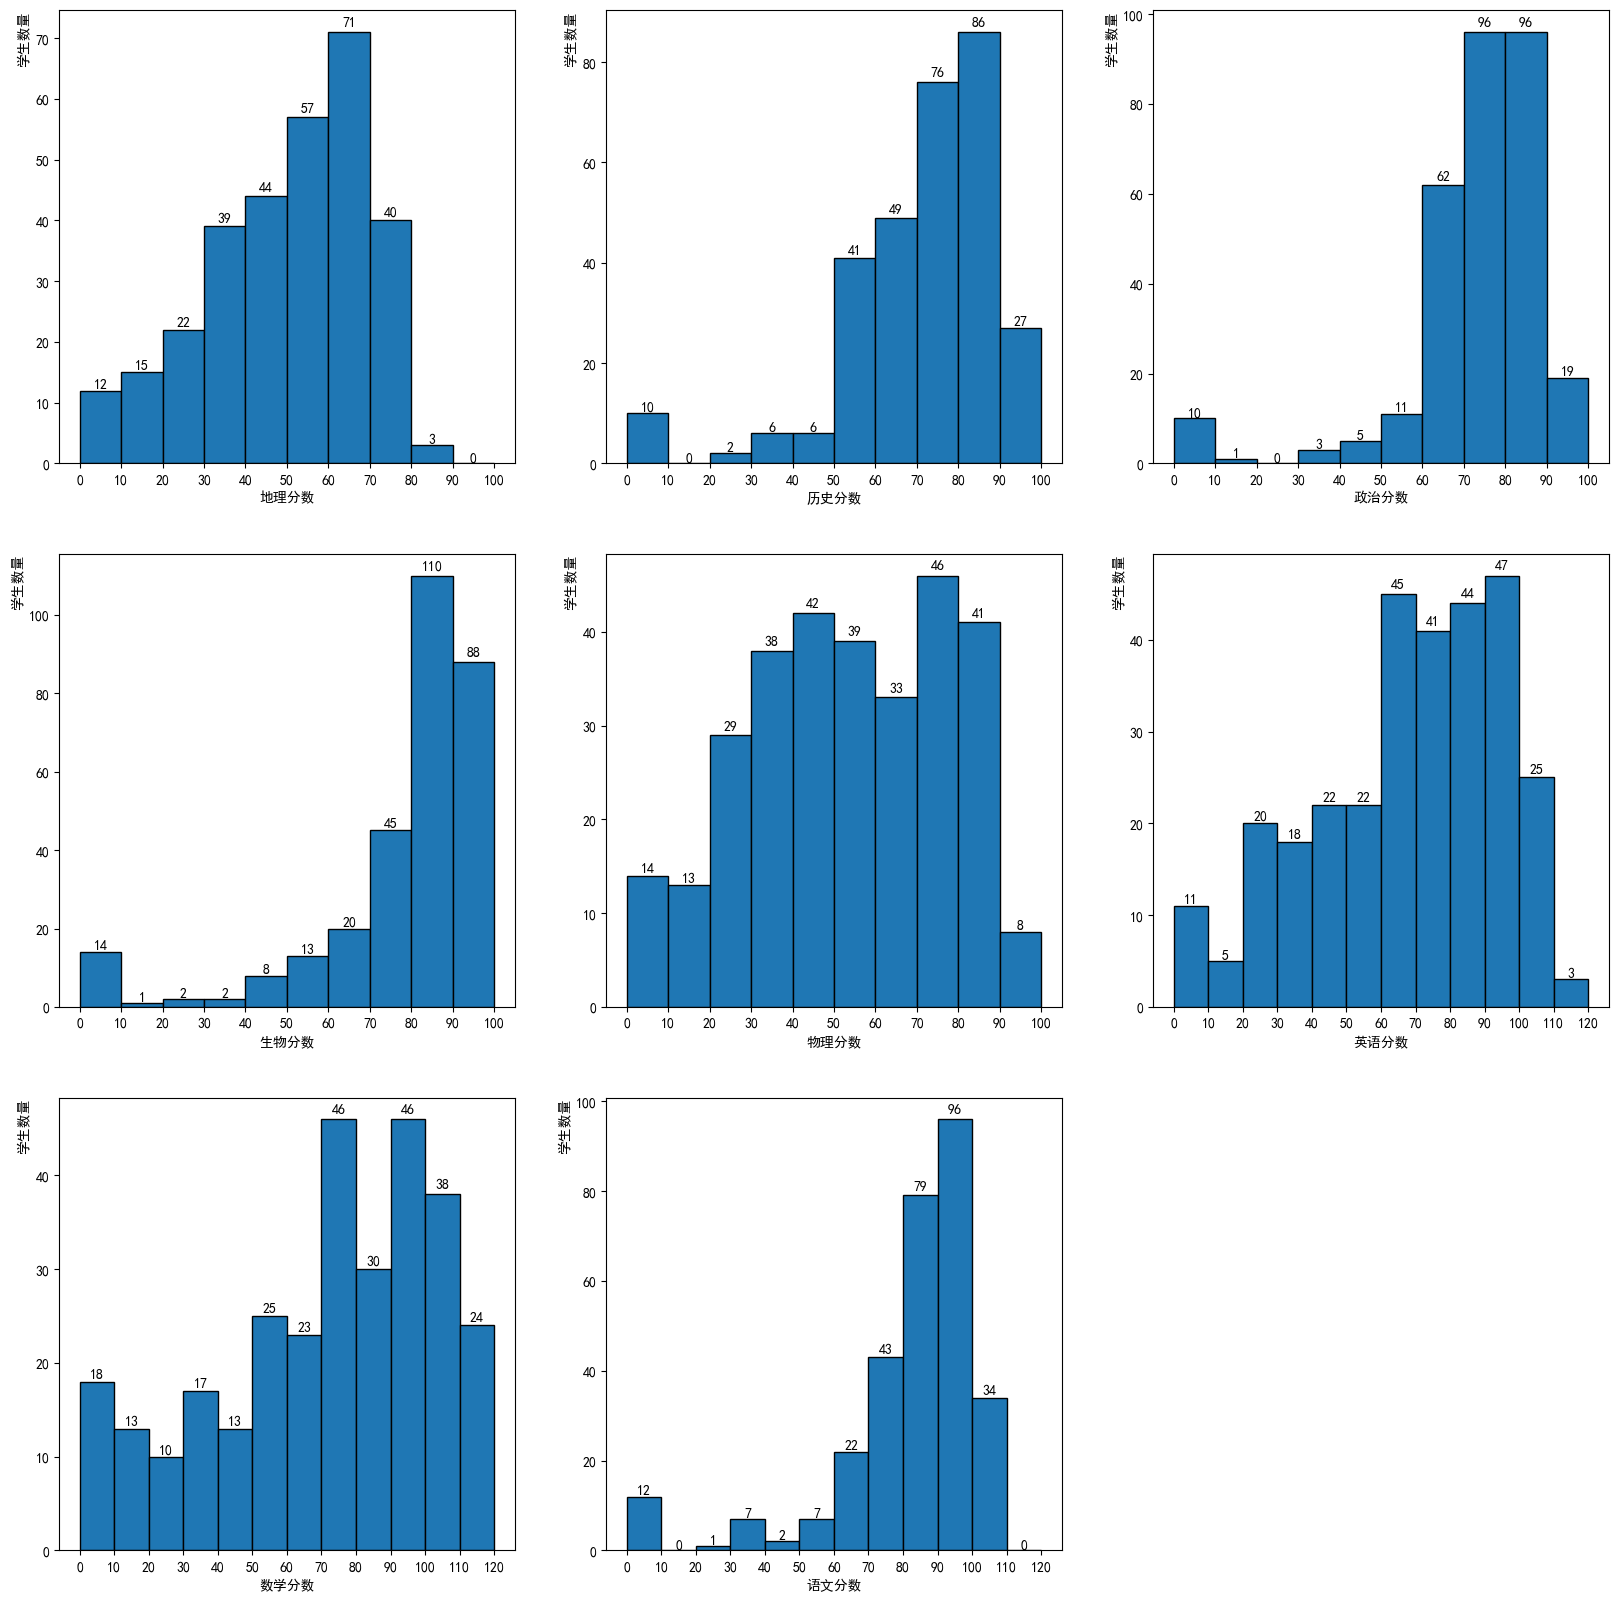

In [151]:
# 创建画布并划分子图
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

def sub(i, j, data, axes):
    # 选择数据列
    data_col = data.columns[i * 3 + j + 1]

    # 设置坐标轴标签
    axes[i, j].set_xlabel(data_col)
    axes[i, j].set_ylabel('学生数量', loc='top')

    # 绘制直方图
    bins = range(0, 121, 10) if data_col in ['语文分数', '数学分数', '英语分数']\
                             else range(0, 101, 10)
    values, _, _ = axes[i, j].hist(data[data_col], bins=bins, edgecolor='black')

    # 设置坐标轴刻度
    axes[i, j].set_xticks(np.array(bins))

    # 为每个条形图添加数值标签
    for index in range(len(values)):
        axes[i, j].text(bins[index] + (bins[1] - bins[0]) / 2,
                        values[index] * 1.01,
                        int(values[index]),
                        ha='center', va='bottom')

# 画出子图
for i in range(3):
    for j in range(3):
        sub(i, j, data, axes)

axes[2, 2].set_visible(False) # 多余的子图不显示

# 显示图像
plt.show()

## 作业5

使用BeijingPM20100101_20151231.csv数据集,展示北京市2010~2015年PM2.5指数月平均数据的变化情况,在同一幅图中绘制六条折线,每年一条折线

In [152]:
# 读入数据
data = pd.read_csv('BeijingPM20100101_20151231.csv')

data

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [153]:
# 按年月分组，计算每个月的平均 PM 值，只保留四个 PM 列
pm_data = data.groupby(['year', 'month'])[
        ['PM_Dongsi', 'PM_US Post', 'PM_Dongsihuan', 'PM_Nongzhanguan']
    ].mean()

pm_data

PM_Dongsi  PM_US Post  PM_Dongsihuan  PM_Nongzhanguan
year month                                                        
2010 1             NaN   90.403670            NaN              NaN
     2             NaN   97.239940            NaN              NaN
     3             NaN   94.046544            NaN              NaN
     4             NaN   80.072423            NaN              NaN
     5             NaN   87.071913            NaN              NaN
...                ...         ...            ...              ...
2015 8       49.458616   44.647376      65.881797        41.849727
     9       54.240845   47.089261      53.357143        52.057437
     10      80.733242   74.602510      26.647059        85.954142
     11     127.215297  124.822222      75.053571       130.704246
     12     162.736339  161.728532     183.905724       162.213699

[72 rows x 4 columns]

In [154]:
# 再对每行的四个 PM 值求平均值，得到每个月的平均 PM 值
pm_data['mean'] = pm_data.mean(axis=1)

# 只保留每个月的平均 PM 值
mean_data = pm_data['mean']

mean_data

year  month
2010  1         90.403670
      2         97.239940
      3         94.046544
      4         80.072423
      5         87.071913
                  ...    
2015  8         50.459379
      9         51.686172
      10        66.984238
      11       114.448834
      12       167.646073
Name: mean, Length: 72, dtype: float64

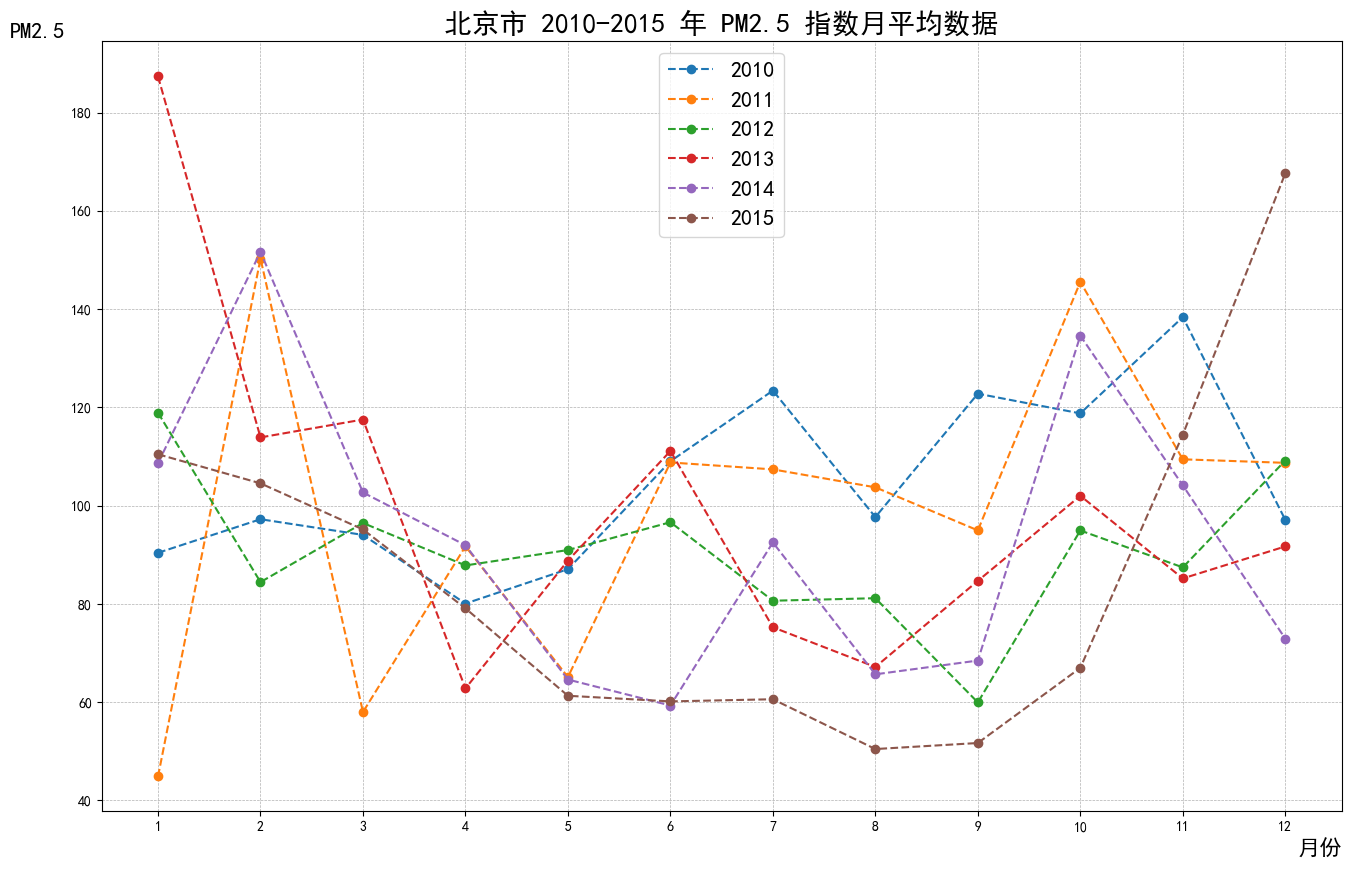

In [155]:
# 创建画布并划分子图
plt.figure(figsize=(16, 10))

# 设置坐标轴标签
plt.xlabel('月份', loc='right', fontdict={'fontsize': 16})
plt.ylabel('PM2.5', loc='top', rotation=0, fontdict={'fontsize': 16})

def line(year, data):
    # 设置坐标轴刻度
    plt.xticks(data[year].index)

    # 设置网格线
    plt.grid(visible=True, linestyle='--', linewidth=0.5)

    # 绘制折线图
    plt.plot(data[year].index, data.loc[year], marker='o', linestyle='--')

# 画出每年的折线图
for year in range(2010, 2016):
    line(year, mean_data)

# 设置标题
plt.title('北京市 2010-2015 年 PM2.5 指数月平均数据', loc='center', fontdict={'fontsize': 20})

# 设置图例
plt.legend(range(2010, 2016), loc='best', fontsize=16)

# 显示图像
plt.show()